# Importing the Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# Calling a Data

In [21]:
jj = pd.DataFrame(pd.read_csv('jj.csv'))
print(jj.head())

         date  data
0  1960-01-01  0.71
1  1960-04-01  0.63
2  1960-07-02  0.85
3  1960-10-01  0.44
4  1961-01-01  0.61


# Exploratory Data Analysis (EDA)

In [22]:
jj.columns

Index(['date', 'data'], dtype='object')

In [23]:
jj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    84 non-null     object 
 1   data    84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [24]:
jj.describe()

,data
count,84.000000
mean,4.799762
std,4.309991
min,0.440000
25%,1.247500
50%,3.510000
75%,7.132500
max,16.200000


In [25]:
jj.set_index('date', inplace=True)
jj.rename(columns={'data': 'sales'}, inplace=True)
jj.head()

,sales
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


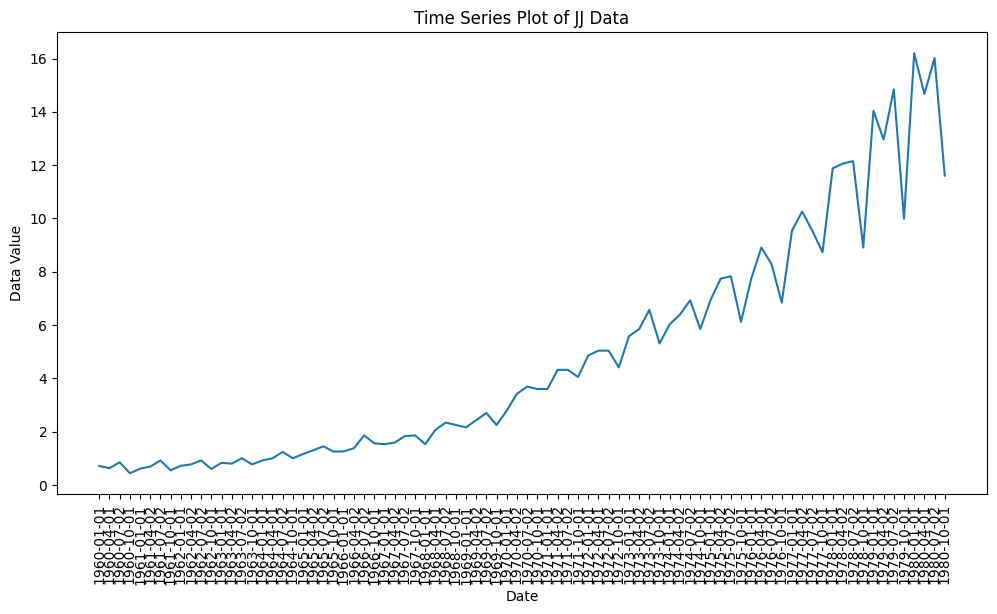

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(jj.index, jj['sales'])
plt.title('Time Series Plot of JJ Data')
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.xticks(rotation=90)
plt.show()




In [27]:
fig = go.Figure()
fig = px.line(jj, x=jj.index, y=jj['sales'])
fig.update_layout(title='Time Series Plot of JJ Data', xaxis_title='Date', yaxis_title='Sales', width=1100, height=600)



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'date=%{x}<br>sales=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['1960-01-01', '1960-04-01', '1960-07-02', '1960-10-01', '1961-01-01',
                          '1961-04-02', '1961-07-02', '1961-10-01', '1962-01-01', '1962-04-02',
                          '1962-07-02', '1962-10-01', '1963-01-01', '1963-04-02', '1963-07-02',
                          '1963-10-01', '1964-01-01', '1964-04-01', '1964-07-02', '1964-10-01',
                          '1965-01-01', '1965-04-02', '1965-07-02', '1965-10-01', '1966-01-01',
                          '1966-04-02', '1966-07-02', '1966-10-01', '1967-01-01', '1967-04-02',
                          '1967-07-02', '1967-10-01', '1968-01-01', '1968-04-01', '1968-07-02',
                          '1968-10-01', '1969-01-01', '1969-04-02', '1969-07-02', '1969-10-01',
                          '1970-01-01', '1970-04-02', '1970-07-02', '1970-10-01', '1971-01-01',
                          '1971-04-02', '1971-07-02', '1971-10-01', '1972-01-01', '1972-04-01',
                          '1972-07-02', '1972-10-01', '1973-01-01', '1973-04-02', '1973-07-02',
                          '1973-10-01', '1974-01-01', '1974-04-02', '1974-07-02', '1974-10-01',
                          '1975-01-01', '1975-04-02', '1975-07-02', '1975-10-01', '1976-01-01',
                          '1976-04-01', '1976-07-02', '1976-10-01', '1977-01-01', '1977-04-02',
                          '1977-07-02', '1977-10-01', '1978-01-01', '1978-04-02', '1978-07-02',
                          '1978-10-01', '1979-01-01', '1979-04-02', '1979-07-02', '1979-10-01',
                          '1980-01-01', '1980-04-01', '1980-07-02', '1980-10-01'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('uB6F61G45j8pXI/C9SjkPzMzMzMzM+' ... 'NwPQpXLUCF61G4HgUwQLgehetROCdA'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'height': 600,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'Time Series Plot of JJ Data'},
               'width': 1100,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Sales'}}}
})

# Decomposition

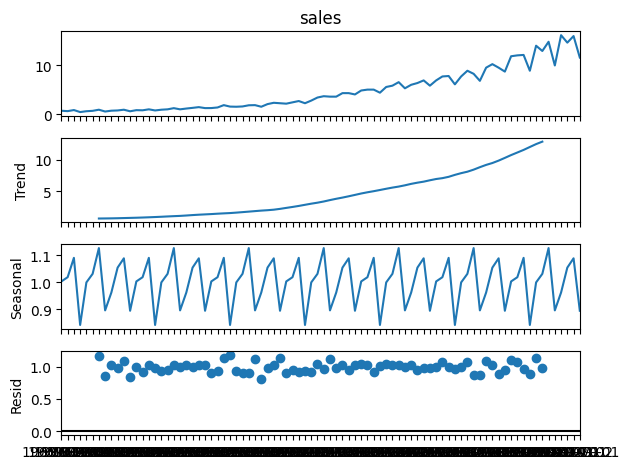

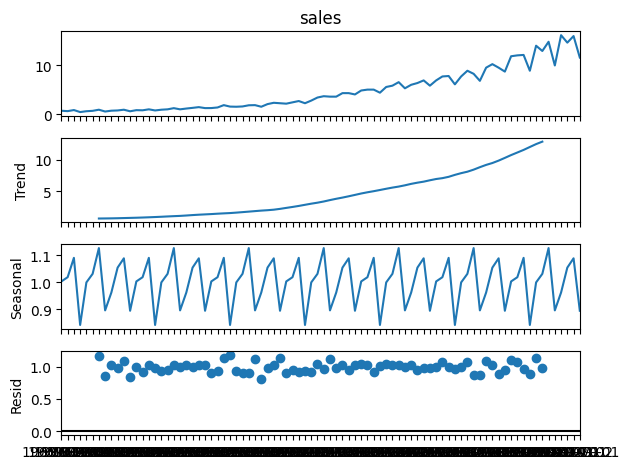

In [28]:
decompose = seasonal_decompose(jj['sales'], model='multiplicative', period=12)
decompose.plot()

### ACF & PACF test

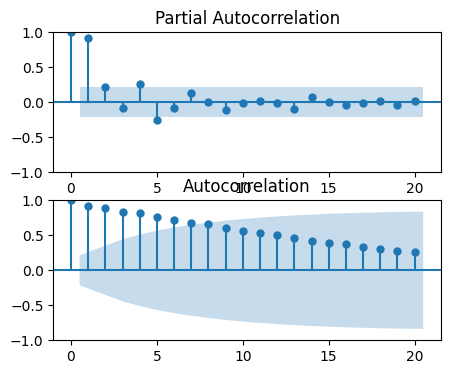

(array([1.        , 0.92510209, 0.88826306, 0.83284799, 0.82407702,
       0.76379985, 0.71759473, 0.67502416, 0.65435568, 0.60833501,
       0.56415176, 0.52556029, 0.50041369, 0.45605045, 0.42265407,
       0.39029328, 0.36993106, 0.33425762, 0.3066269 , 0.27784   ]), array([[ 1.        ,  1.        ],
       [ 0.71125248,  1.13895169],
       [ 0.53611647,  1.24040964],
       [ 0.38993401,  1.27576197],
       [ 0.31455271,  1.33360132],
       [ 0.19658911,  1.33101058],
       [ 0.10515141,  1.33003804],
       [ 0.02526642,  1.32478191],
       [-0.0267178 ,  1.33542915],
       [-0.10090681,  1.31757684],
       [-0.16856369,  1.2968672 ],
       [-0.22675726,  1.27787784],
       [-0.26851095,  1.26933833],
       [-0.327626  ,  1.2397269 ],
       [-0.37306668,  1.21837482],
       [-0.41562867,  1.19621522],
       [-0.44458885,  1.18445097],
       [-0.48790985,  1.15642509],
       [-0.52173194,  1.13498574],
       [-0.5556933 ,  1.1113733 ]]))


In [29]:
# Original Series
fig, axes = plt.subplots(2,1, figsize=(5, 4))
# axes[0].plot(jj['sales']); axes[0].set_title('Original Series')
plot_pacf(jj['sales'], ax=axes[0], alpha=0.05)
plot_acf(jj['sales'], ax=axes[1])

# # First Differencing
# axes[1,0].plot(jj['sales'].diff()); axes[1,0].set_title('First Differencing')
# plot_acf(jj['sales'].diff().dropna(), ax=axes[1,1])

# # Second Differencing
# axes[2,0].plot(jj['sales'].diff().diff()); axes[2,0].set_title('Second Differencing')
# plot_acf(jj['sales'].diff().diff().dropna(), ax=axes[2,1])
# plt.tight_layout()
plt.show()

x_acf = acf(jj['sales'], alpha=0.05)
print(x_acf)

In [30]:
result = adfuller(jj['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Is data stationary?', result[1] < 0.05)  

ADF Statistic: 2.7420165734574735
p-value: 1.0
Is data stationary? False


#### Using Log Transformation & make data stationary

In [31]:
# take the log()

jj['sales_log'] = np.log(jj['sales'])

# then take the first difference
jj['sales_tr_1'] = jj['sales_log'].diff()

jj.head(10)

,sales,sales_log,sales_tr_1
date,,,
1960-01-01,0.71,-0.342490,NaN
1960-04-01,0.63,-0.462035,-0.119545
1960-07-02,0.85,-0.162519,0.299517
1960-10-01,0.44,-0.820981,-0.658462
1961-01-01,0.61,-0.494296,0.326684
1961-04-02,0.69,-0.371064,0.123233
1961-07-02,0.92,-0.083382,0.287682
1961-10-01,0.55,-0.597837,-0.514455
1962-01-01,0.72,-0.328504,0.269333


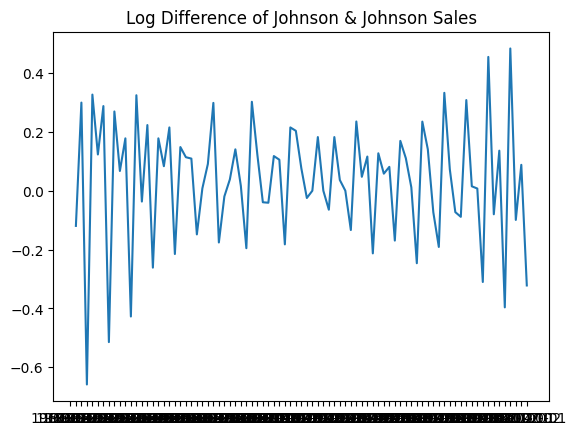

In [32]:
# plot

plt.plot(jj['sales_tr_1'])
plt.title("Log Difference of Johnson & Johnson Sales")
plt.show()

In [33]:

result = adfuller(jj['sales_tr_1'][1:])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Is data stationary?', result[1] < 0.05) 

ADF Statistic: -4.317043945811843
p-value: 0.00041497314044405543
Is data stationary? True


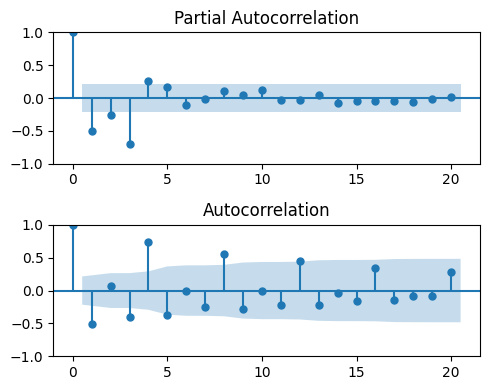

[ 1.         -0.5068176   0.06710083 -0.40283604  0.73144783 -0.36664626
 -0.00355752 -0.25135173  0.55746623 -0.27936851 -0.00985624 -0.21778551
  0.45050739 -0.21290808 -0.04169822 -0.15145071  0.34639585 -0.14297472
 -0.07922696 -0.08649478]


In [34]:
# plot the ACF and PACF

fig, axes = plt.subplots(2,1, figsize=(5, 4))
# axes[0].plot(jj['sales']); axes[0].set_title('Original Series')
plot_pacf(jj['sales_tr_1'][1:], ax=axes[0])
plot_acf(jj['sales_tr_1'][1:], ax=axes[1])
plt.tight_layout()
plt.show()

x_acf = acf(jj['sales_tr_1'][1:])
print(x_acf)

# ARIMA Model

### On JJ data

In [49]:
#  Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC)
# Grid search for best ARIMA model
warnings.filterwarnings("ignore")

best_aic = np.inf
best_order = None
best_model = None

for p in range(8):
    for q in range(8):
        try:
            model = ARIMA(jj['sales'], order=(p, 1, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p, 1, q)
                best_model = model
        except:
            continue

best_order, best_aic

((6, 1, 3), 115.72875261009919)

In [18]:
# from pmdarima.arima import auto_arima
# model = auto_arima(jj['sales'], start_p=2, start_q=2, max_p=8, max_q=8, seasonal=False, trace=True, suppress_warnings=True)
# model.summary()

In [50]:
# p,d,q ARIMA Model
best_model = ARIMA(jj['sales'], order=(6,1,3))

best_model_fit = best_model.fit()
#summary of the model
print(best_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   84
Model:                 ARIMA(6, 1, 3)   Log Likelihood                 -47.864
Date:                Fri, 11 Apr 2025   AIC                            115.729
Time:                        15:44:43   BIC                            139.917
Sample:                             0   HQIC                           125.446
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4830      0.126    -11.759      0.000      -1.730      -1.236
ar.L2         -0.7801      0.145     -5.391      0.000      -1.064      -0.496
ar.L3          0.0358      0.061      0.591      0.5

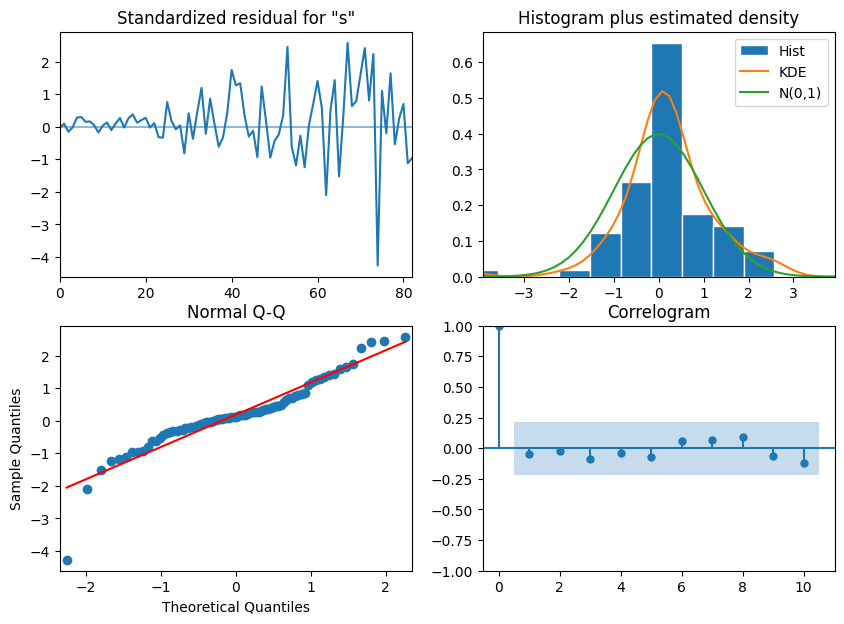

In [51]:
best_model_fit.plot_diagnostics(figsize=(10,7))
plt.show()

In [52]:
forecast = best_model_fit.predict(len(jj), len(jj)+30)
# jj['forecast'] = forecast
print(jj)
print('_'*150)
print(pd.DataFrame(forecast))

            sales  sales_log  sales_tr_1
date                                    
1960-01-01   0.71  -0.342490         NaN
1960-04-01   0.63  -0.462035   -0.119545
1960-07-02   0.85  -0.162519    0.299517
1960-10-01   0.44  -0.820981   -0.658462
1961-01-01   0.61  -0.494296    0.326684
...           ...        ...         ...
1979-10-01   9.99   2.301585   -0.396415
1980-01-01  16.20   2.785011    0.483427
1980-04-01  14.67   2.685805   -0.099207
1980-07-02  16.02   2.773838    0.088033
1980-10-01  11.61   2.451867   -0.321971

[84 rows x 3 columns]
______________________________________________________________________________________________________________________________________________________
     predicted_mean
84        17.355900
85        16.480288
86        17.215483
87        13.325442
88        18.975048
89        17.782685
90        18.788680
91        14.870715
92        20.533506
93        19.279894
94        20.110867
95        16.627199
96        21.956027
97        20.

In [251]:
len(forecast.index)

31

In [53]:
forecast.index = pd.date_range(start=jj.index[-1], periods=len(forecast), freq='MS')
forecast = pd.DataFrame(forecast)
forecast.index.name = 'Date'
print(forecast.head(10))

            predicted_mean
Date                      
1980-10-01       17.355900
1980-11-01       16.480288
1980-12-01       17.215483
1981-01-01       13.325442
1981-02-01       18.975048
1981-03-01       17.782685
1981-04-01       18.788680
1981-05-01       14.870715
1981-06-01       20.533506
1981-07-01       19.279894


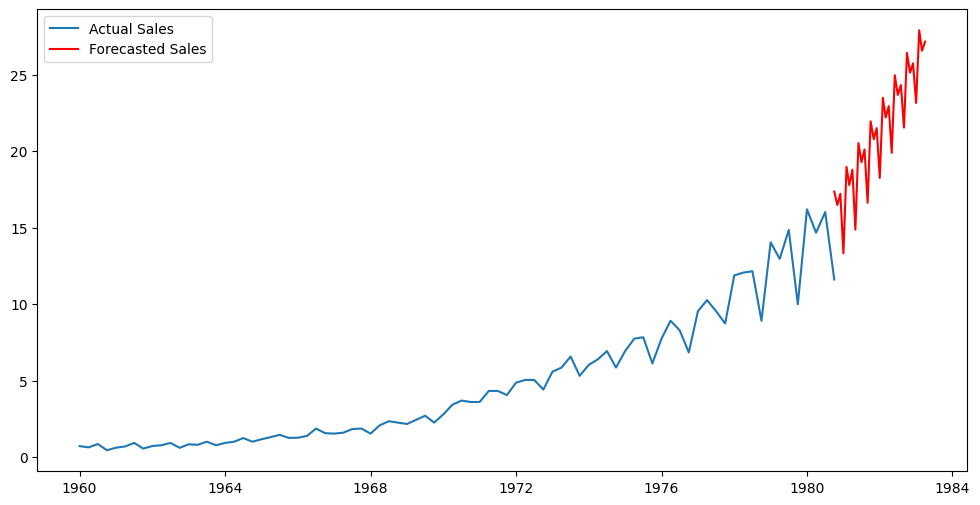

In [54]:
# Ensure the forecast index is a DatetimeIndex
forecast.index = pd.to_datetime(forecast.index)

# Ensure jj.index is also a DatetimeIndex
jj.index = pd.to_datetime(jj.index)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(jj.index, jj['sales'], label='Actual Sales')
plt.plot(forecast.index, forecast['predicted_mean'], label='Forecasted Sales', color='red')
plt.legend()
plt.show()

In [55]:
#get prediction start and end dates
test_data = jj['sales']

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

#get the predictions and residuals
predictions = best_model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

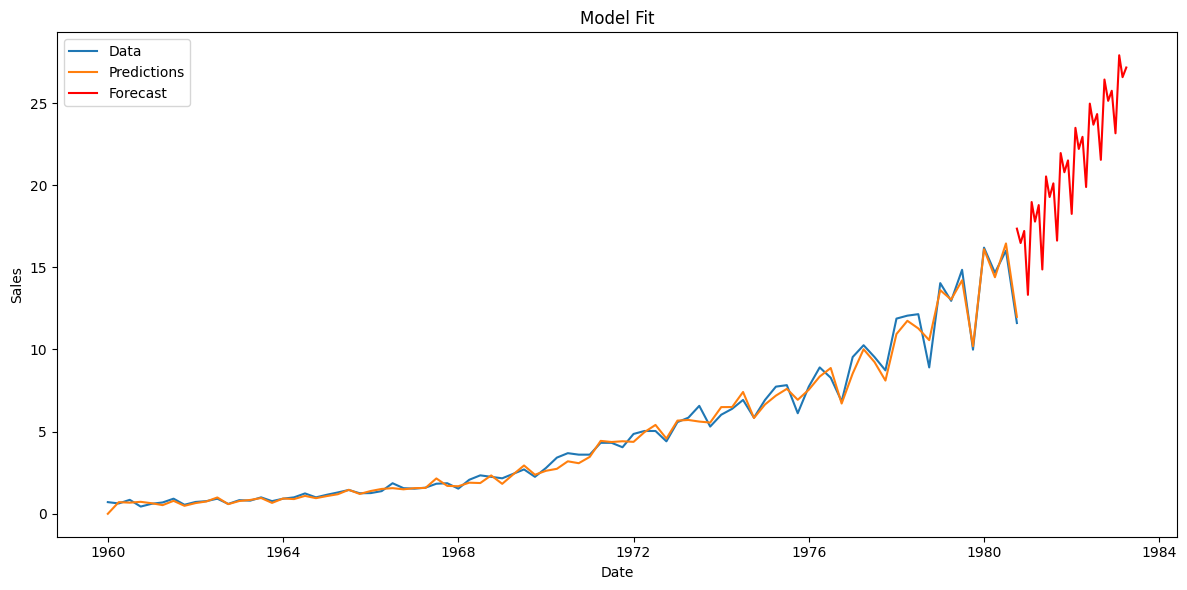

In [56]:

# Convert 'date' column to datetime
test_data.index = pd.to_datetime(test_data.index)
forecast.index = pd.to_datetime(forecast.index)

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.plot(forecast.index, forecast['predicted_mean'], label='Forecast', color='red')

# # Set xticks to every 4th date
# plt.xticks(
#     ticks=test_data.index[::4],
#     labels=test_data.index[::4].strftime('%Y-%m-%d'),
#     rotation=45
# )

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Model Fit')
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [58]:
# Slice predictions to match the test_data index
# predictions_test = predictions[test_data.index]

# Evaluate the accuracy of the ARIMA model
print("Evaluation metrics of ARIMA model")
print(forecast_accuracy(predictions, test_data))

Evaluation metrics of ARIMA model
{'mape': 0.08954382702098049, 'me': -0.07834318889475307, 'mae': 0.27788045836541064, 'mpe': -0.027501248456582358, 'rmse': 0.3996114574007747}


# LSTM model

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0467 - val_loss: 0.5489
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0354 - val_loss: 0.4426
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0253 - val_loss: 0.3325
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0162 - val_loss: 0.2190
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0092 - val_loss: 0.1133
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0067 - val_loss: 0.0452
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0106 - val_loss: 0.0287
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0128 - val_loss: 0.0312
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0102 - val_loss: 0.0448
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0065 - val_loss: 0.0673
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0044 - val_loss: 0.0921
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0042 

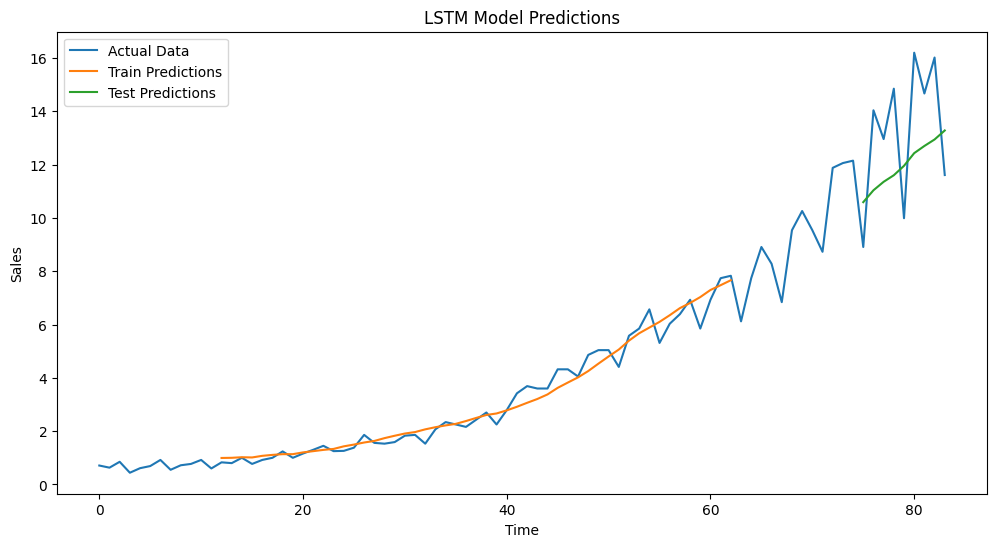

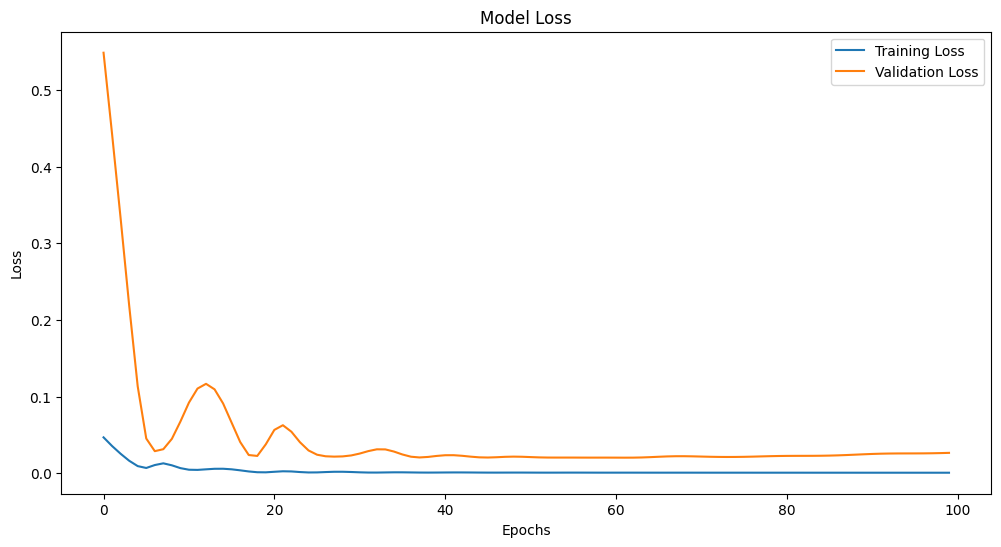

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

import matplotlib.pyplot as plt

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
jj_scaled = scaler.fit_transform(jj[['sales']])

# Split the data into training and testing sets
train_size = int(len(jj_scaled) * 0.75)  # 75% for training
test_size = len(jj_scaled) - train_size
train_data, test_data = jj_scaled[:train_size], jj_scaled[train_size:]

# Function to create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare the training and testing datasets
time_step = 12  # Number of previous time steps to consider
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # First hidden layer
model.add(LSTM(75, return_sequences=True))  # Second hidden layer
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform([y_train])
y_test_actual = scaler.inverse_transform([y_test])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(jj_scaled), label='Actual Data')
plt.plot(np.arange(time_step, len(train_predict) + time_step), train_predict, label='Train Predictions')
plt.plot(np.arange(len(train_predict) + 2 * time_step, len(train_predict) + 2 * time_step + len(test_predict)), test_predict, label='Test Predictions')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

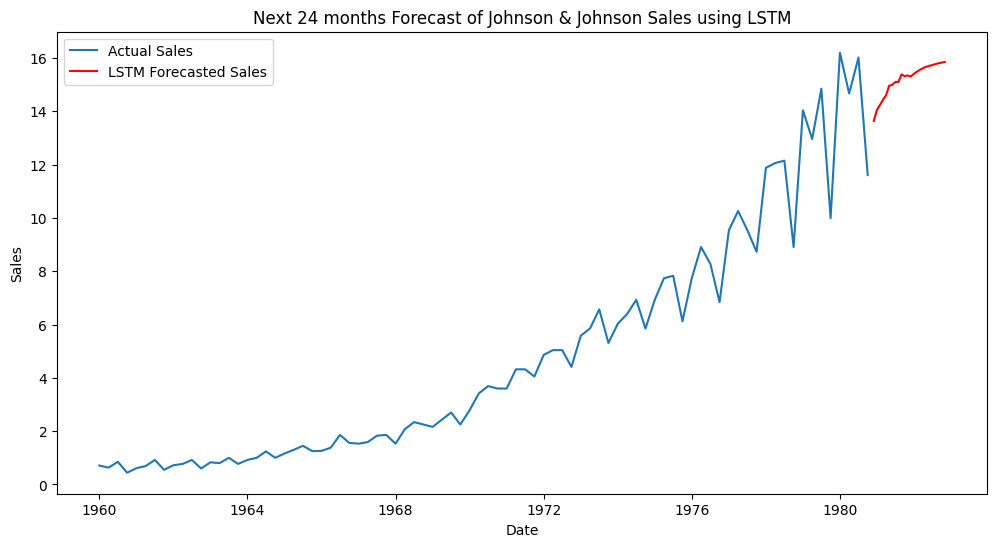

In [280]:
# Prepare the data for forecasting
forecast_steps = 24
input_data = X_test[-1]  # Start with the last sequence from the test data
forecasted_values = []

for _ in range(forecast_steps):
    # Predict the next value
    prediction = model.predict(input_data.reshape(1, input_data.shape[0], 1), verbose=0)
    forecasted_values.append(prediction[0, 0])
    
    # Update the input data with the predicted value
    input_data = np.append(input_data[1:], prediction[0, 0]).reshape(-1, 1)

# Inverse transform the forecasted values
forecasted_values = scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1))

# Create a date range for the forecast
forecast_index = pd.date_range(start=jj.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(jj.index, jj['sales'], label='Actual Sales')
plt.plot(forecast_index, forecasted_values, label='LSTM Forecasted Sales', color='red')
plt.title('Next 24 months Forecast of Johnson & Johnson Sales using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Confidence interval

In [ ]:
# use get_forecast() for this

# make the predictions for 24 steps ahead
predictions_int = best_model_fit.get_forecast(steps=24)
predictions_int.predicted_mean

84     17.355900
85     16.480288
86     17.215483
87     13.325442
88     18.975048
89     17.782685
90     18.788680
91     14.870715
92     20.533506
93     19.279894
94     20.110867
95     16.627199
96     21.956027
97     20.788345
98     21.510630
99     18.252807
100    23.491778
101    22.206516
102    22.944880
103    19.889018
104    24.965722
105    23.683198
106    24.330179
107    21.543124
108    26.431549
109    25.134324
Name: predicted_mean, dtype: float64

In [61]:
# get a better view
predictions_int.conf_int()

,lower sales,upper sales
84,16.593353,18.118448
85,15.697078,17.263499
86,16.362783,18.068182
87,12.471627,14.179257
88,17.572831,20.377264
89,16.354512,19.210859
90,17.253978,20.323382
91,13.303395,16.438034
92,18.555850,22.511163
93,17.224670,21.335117


In [62]:
# add the predicted mean column in

conf_df = pd.concat([predictions_int.predicted_mean, predictions_int.conf_int()], axis = 1)

conf_df.head()

,predicted_mean,lower sales,upper sales
84,17.355900,16.593353,18.118448
85,16.480288,15.697078,17.263499
86,17.215483,16.362783,18.068182
87,13.325442,12.471627,14.179257
88,18.975048,17.572831,20.377264


In [63]:
# change the name of the column heads

conf_df = conf_df.rename(columns={'predicted_mean': 'Predictions', 'lower sales': 'Lower CI', 'upper sales': 'Upper CI'})
conf_df.head()

,Predictions,Lower CI,Upper CI
84,17.355900,16.593353,18.118448
85,16.480288,15.697078,17.263499
86,17.215483,16.362783,18.068182
87,13.325442,12.471627,14.179257
88,18.975048,17.572831,20.377264


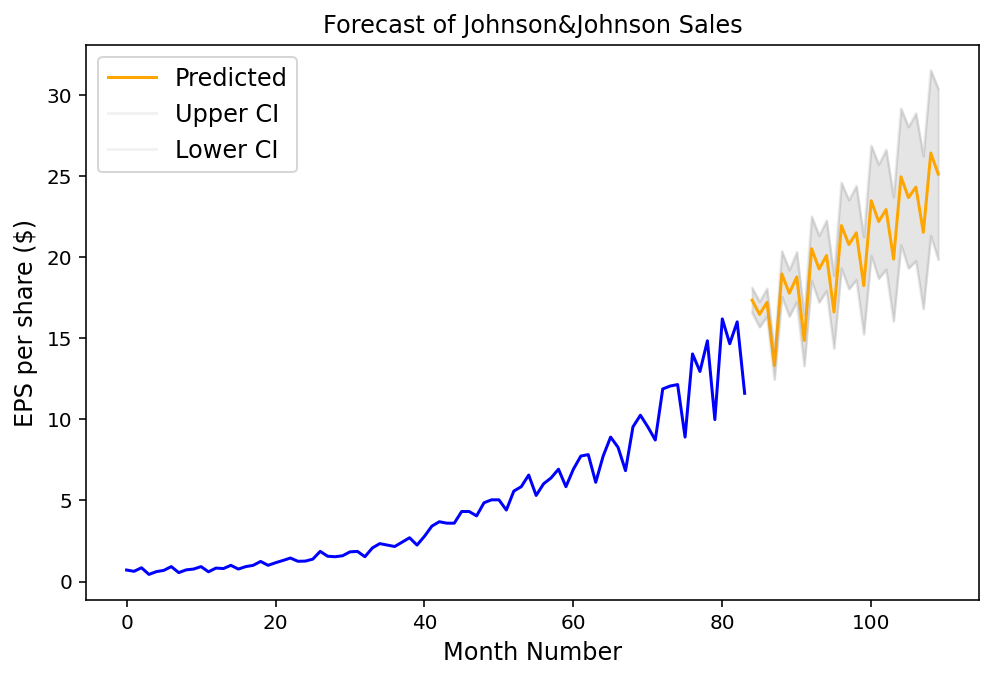

In [67]:
# make a plot of model fit
# color = 'dodgeblue'

#fig = plt.figure(figsize = (8,5), dpi=144)
#ax1 = fig.add_subplot(111)

jj1 = jj.copy()
jj1.reset_index(inplace=True)

fig, ax = plt.subplots(figsize = (8,5), dpi=144)
ax.plot(jj1['sales'], 'b')
#ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'k--')

ax.set(title='Forecast of Johnson&Johnson Sales')


x = conf_df.index.values


upper = conf_df['Upper CI']
lower = conf_df['Lower CI']


conf_df['Predictions'].plot(color = 'orange',label = 'Predicted' )
upper.plot(color = 'grey', label = 'Upper CI', alpha=0.1)
lower.plot(color = 'grey', label = 'Lower CI', alpha=0.1)

# fill between the conf intervals
ax.fill_between(x, lower, upper, color='grey', alpha=0.2)

plt.ylabel('EPS per share ($)', fontsize=12)
plt.xlabel('Month Number', fontsize=12)

plt.legend(loc = 'upper left', fontsize = 12)


plt.show()